# Lab 4:  Preprocessing operations
## Feature transformation, construction and selection

We will load the Titanic dataset to look at features in this lab.  You can download it from https://www.kaggle.com/c/titanic/data

The dataset is already divided into a train and test set so you can read both separately, although only the train set has an outcome variable recorded.  The test set is there for you to provide your own predictions which can be submitted to the competition in Kaggle. We will start as usual loading the libraries.


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)
print("Setup complete.")

Setup complete.


## Reading the file

First we read the data and make some preliminary observation of the values for the different attributes.  

In [2]:
#designate the path where you saved your Titanic data
Titanic_Train_path = "/Users/ringi/Documents/code/data-mining/datasets/Titanic_train.csv"
#We won't be using this file but you can load it if you wish to examine a bit
Titanic_Test_path = "/Users/ringi/Documents/code/data-mining/datasets/Titanic_test.csv"
#Load the data using pandas read_csv function. 

Titanic_Train = pd.read_csv(Titanic_Train_path)
Titanic_Test =pd.read_csv(Titanic_Test_path)                       
Titanic_Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Let us now understand how much data (attributes and records) do we have in each dataset.  For this we can use the `shape`method.  We can also use the `describe()` method to understand the values within the training or test data. 

In [3]:
print("Shape of training data:",Titanic_Train.shape)
print("Shape of test data:",Titanic_Test.shape)
Titanic_Train.describe()


Shape of training data: (891, 12)
Shape of test data: (418, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can also look at the type of columns and other information by using the `info()` method which gives us data type, count of non-null values and more.  We can sample a few records using `sample()` to observe futher some randomly picked records.  

In [4]:
print(Titanic_Train.info())
Titanic_Train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C


We can see that a number of records, e.g. _'PassengerId', 'Survived', 'Pclass', 'SibSp','Parch'_ are integers and others, e.g. _'Age','Fare'_, are of type float, with the rest being strings.   In fact, what we can find on the attributes from the Kaggle page is:

- `PassengerId` is the unique id of the row and it doesn't have any effect on target, so we could ignore it.
- `Survived` is the target variable we are trying to predict (0 or 1):
    - 1 = Survived
    - 0 = Not Survived
- `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
   -  1 = Upper Class
   -  2 = Middle Class
   -  3 = Lower Class
- `Name`, `Sex` and `Age` are self-explanatory.  Name is not useful initially but we may extract features from it 
- `SibSp` is the total number of the passengers' siblings and spouse
- `Parch` is the total number of the passengers' parents and children
- `Ticket` is the ticket number of the passenger
- `Fare` is the passenger fare
- `Cabin` is the cabin number of the passenger
- `Embarked` is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
   -  C = Cherbourg
   -  Q = Queenstown
   -  S = Southampton
 
So the Numeric columns we may want to use are `PClass`, `Age`, ` SibSp`, `Parch` and `Fare`.  The categorical Columns are `Name`,`Sex`, `Ticket`,`Cabin` and `embarked`. We can define those as arrays. 

In [5]:
print(Titanic_Train.columns)
NumCOLUMNS=["Pclass","Age","SibSp","Parch","Fare"]
CatCOLUMNS =["Name","Sex","Ticket","Cabin","Embarked"]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Visualisation

Some data familiarisation can also take place with visualisations of every variable against the target variable as we saw in earlier labs. 

In [6]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Vis setup Complete")

Vis setup Complete


We first separate the data into the records for the two classed (survived or died). Then we use the `sns.kdeplot` for each numeric variable as we have done before.

In [7]:
Titanic_data_Died = Titanic_Train.loc[(Titanic_Train.Survived==0)]
Titanic_data_Sur = Titanic_Train.loc[(Titanic_Train.Survived==1)]

We can define a function for the superimposed KDE plots so we can call it again.

/usr/local/Caskroom/mambaforge/base/envs/uea/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/mambaforge/base/envs/uea/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/mambaforge/base/envs/uea/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/mambaforge/base/envs/uea/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWar

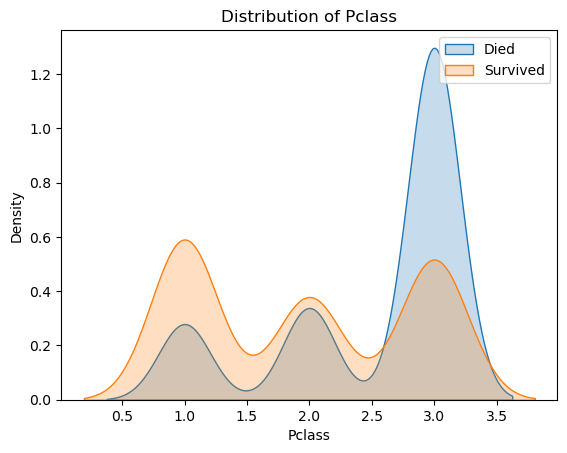

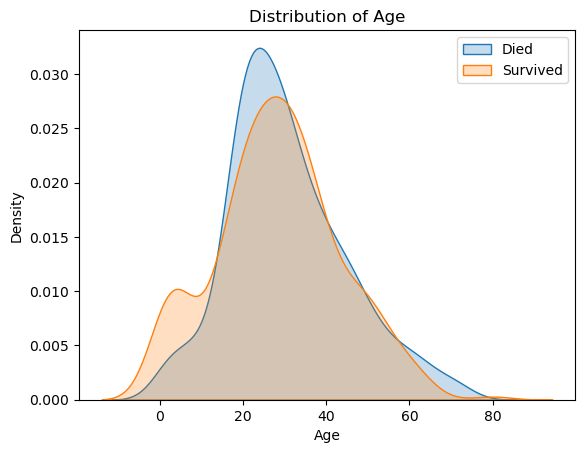

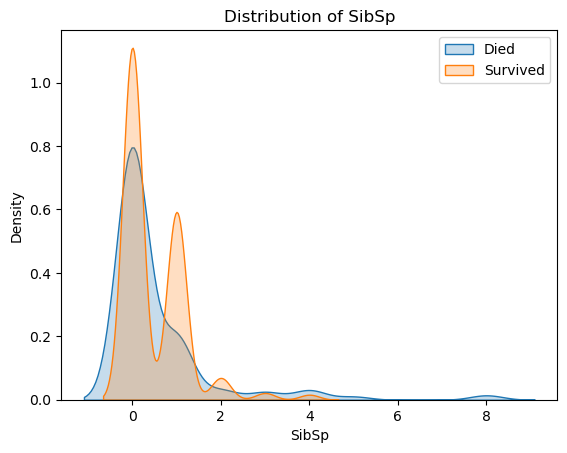

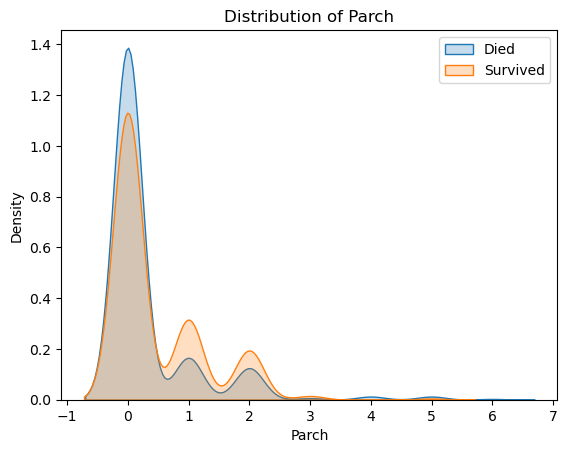

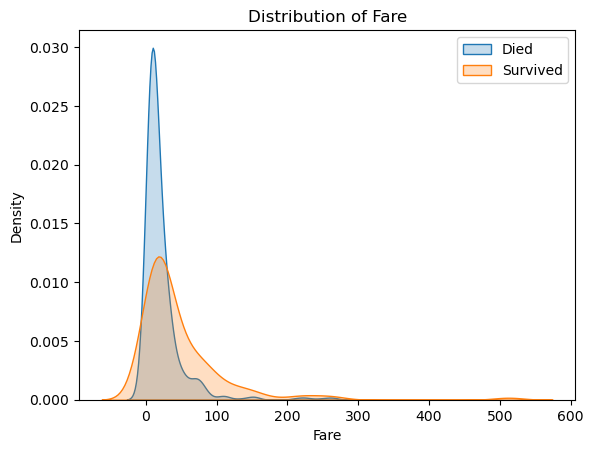

In [26]:
def KDEPlots(df1,df2,label1,label2,column):
    """ Make KDE plots by superimposing KDE plots for df1 and df2"""
    #make sure that plot merges the two plots below by using the following command
    plt.figure()
    # produce a plot for each label so they interlink
    sns.kdeplot(data=df1,label=label1, fill=True)
    sns.kdeplot(data=df2,label=label2,fill=True)
     #include a legend
    plt.legend()
    #include a dynamic title
    plt.title("Distribution of " +column)
    return

for column in NumCOLUMNS:
    KDEPlots(Titanic_data_Died[column],Titanic_data_Sur[column],'Died','Survived',column)


What we have found so far from those graphs is that Pclass seems to see differentiation with those is Upper class (class 1) more likely to survive and those on lower class (class 3) more likely to die.  The very young were also more likely to survive, in terms of age.  Those with 1 or 2 sibblings or spouses were also more likely to survive. The same is found for Parch 1 or 2, who are more likely to survive.  Finally those on higher fares appear more likely to survive.  Those observations take no account of feature interactions though.  

We can now visualise the categorical columns as we did before using `sns.countplot`. We do this for each categorical columns. Again we can have a function for this so we can call later, including vertical labels, etc.

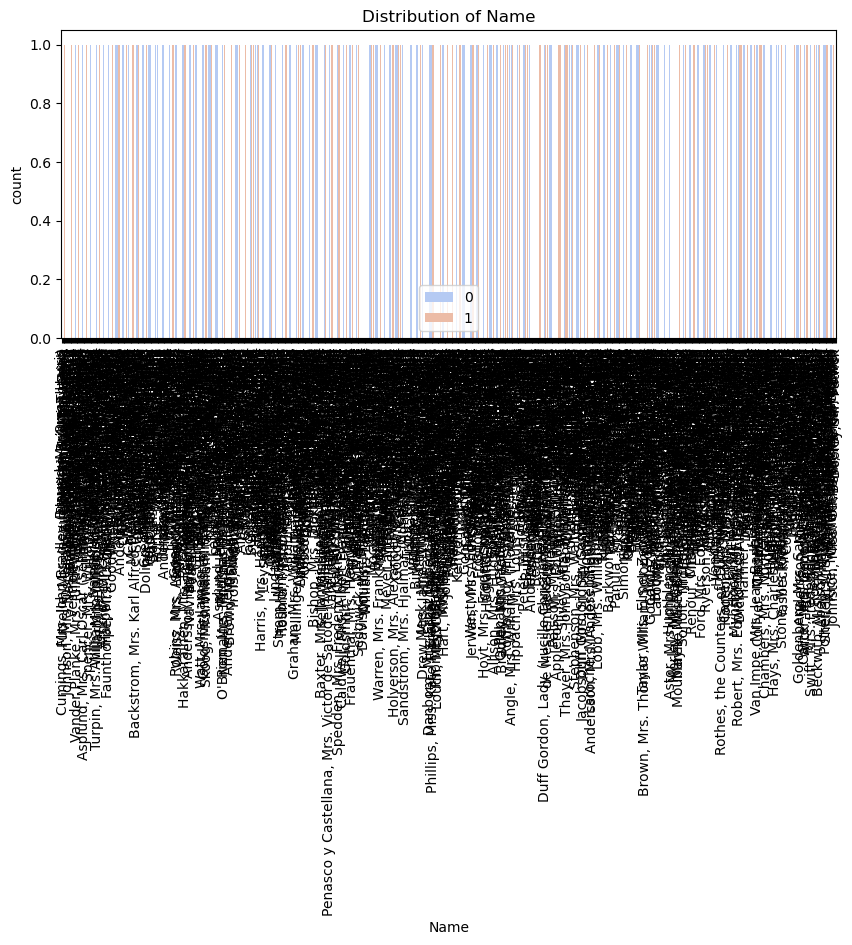

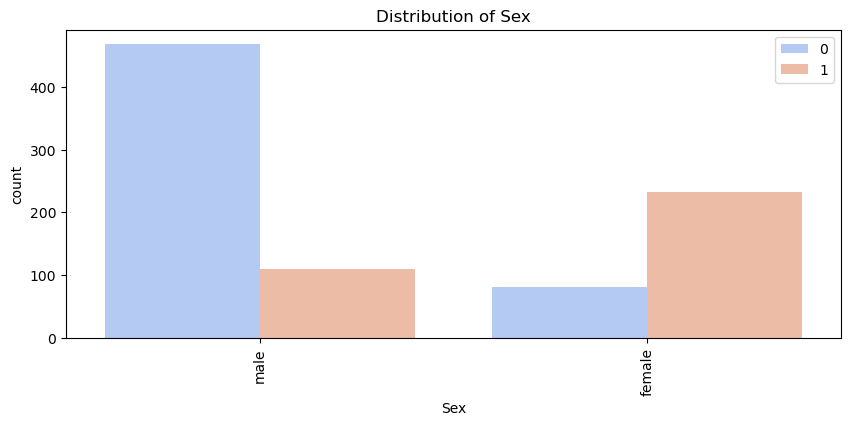

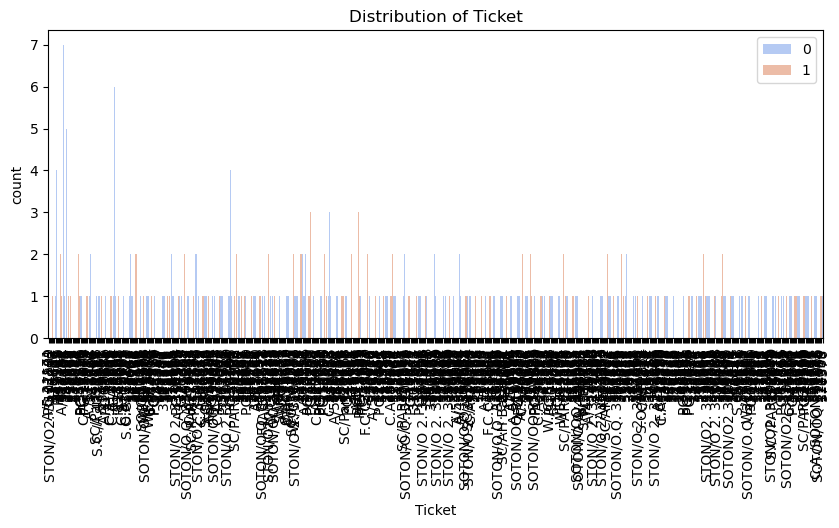

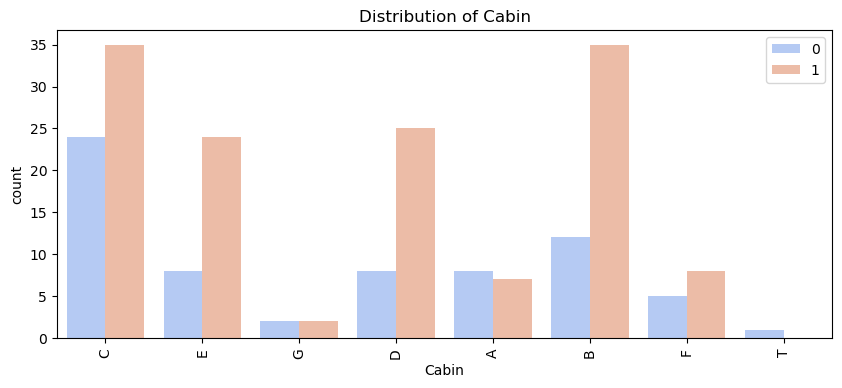

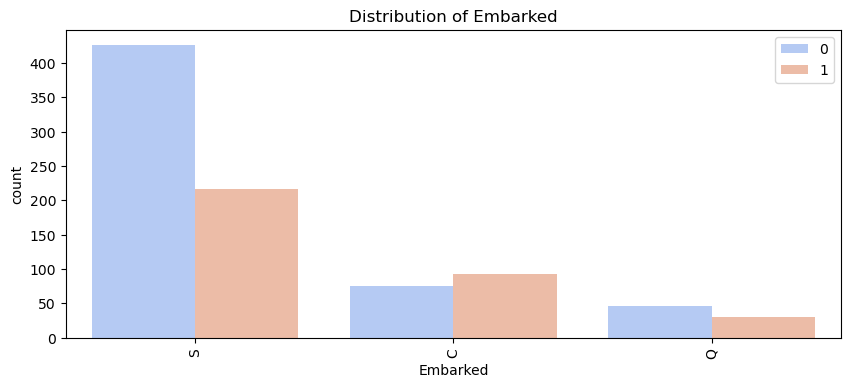

In [27]:
def DistPlot(df,hue,column):
    """ Make distribution plots of df for a defined column using hue"""
    plt.figure(figsize=(10,4))
    #Set labels to be vertical in the axis
    plt.xticks(rotation=90)
    # produce a plot 
    sns.countplot(x=column, hue=hue,palette="coolwarm", data=df)
    #include a dynamic title
    plt.title("Distribution of " +column)
     #include a legend
    plt.legend()
    return

for column in CatCOLUMNS:
    DistPlot(Titanic_Train,'Survived',column)

We can also look draw the following conclusions from the graphs above.  `Sex` did seem to have a definitive influence on survival, with females surviving proportionally more. There are too many values of `Name` `Cabin` and `ticket` for those to be useful so we may have to transform them into more meaninful attributes.  Finally, `Embarked` also seems to have some influence with those in Cherbourg more likely to survive.  

We can see the unique values in each, `Cabin` and `Ticket`.  

In [28]:
print(Titanic_Train.Cabin.unique())
print(Titanic_Train.Ticket.unique())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919'

## New features: transformation

The `Cabin` attribute requires further exploration. It turns out that the first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.  See a picture of the ship here:
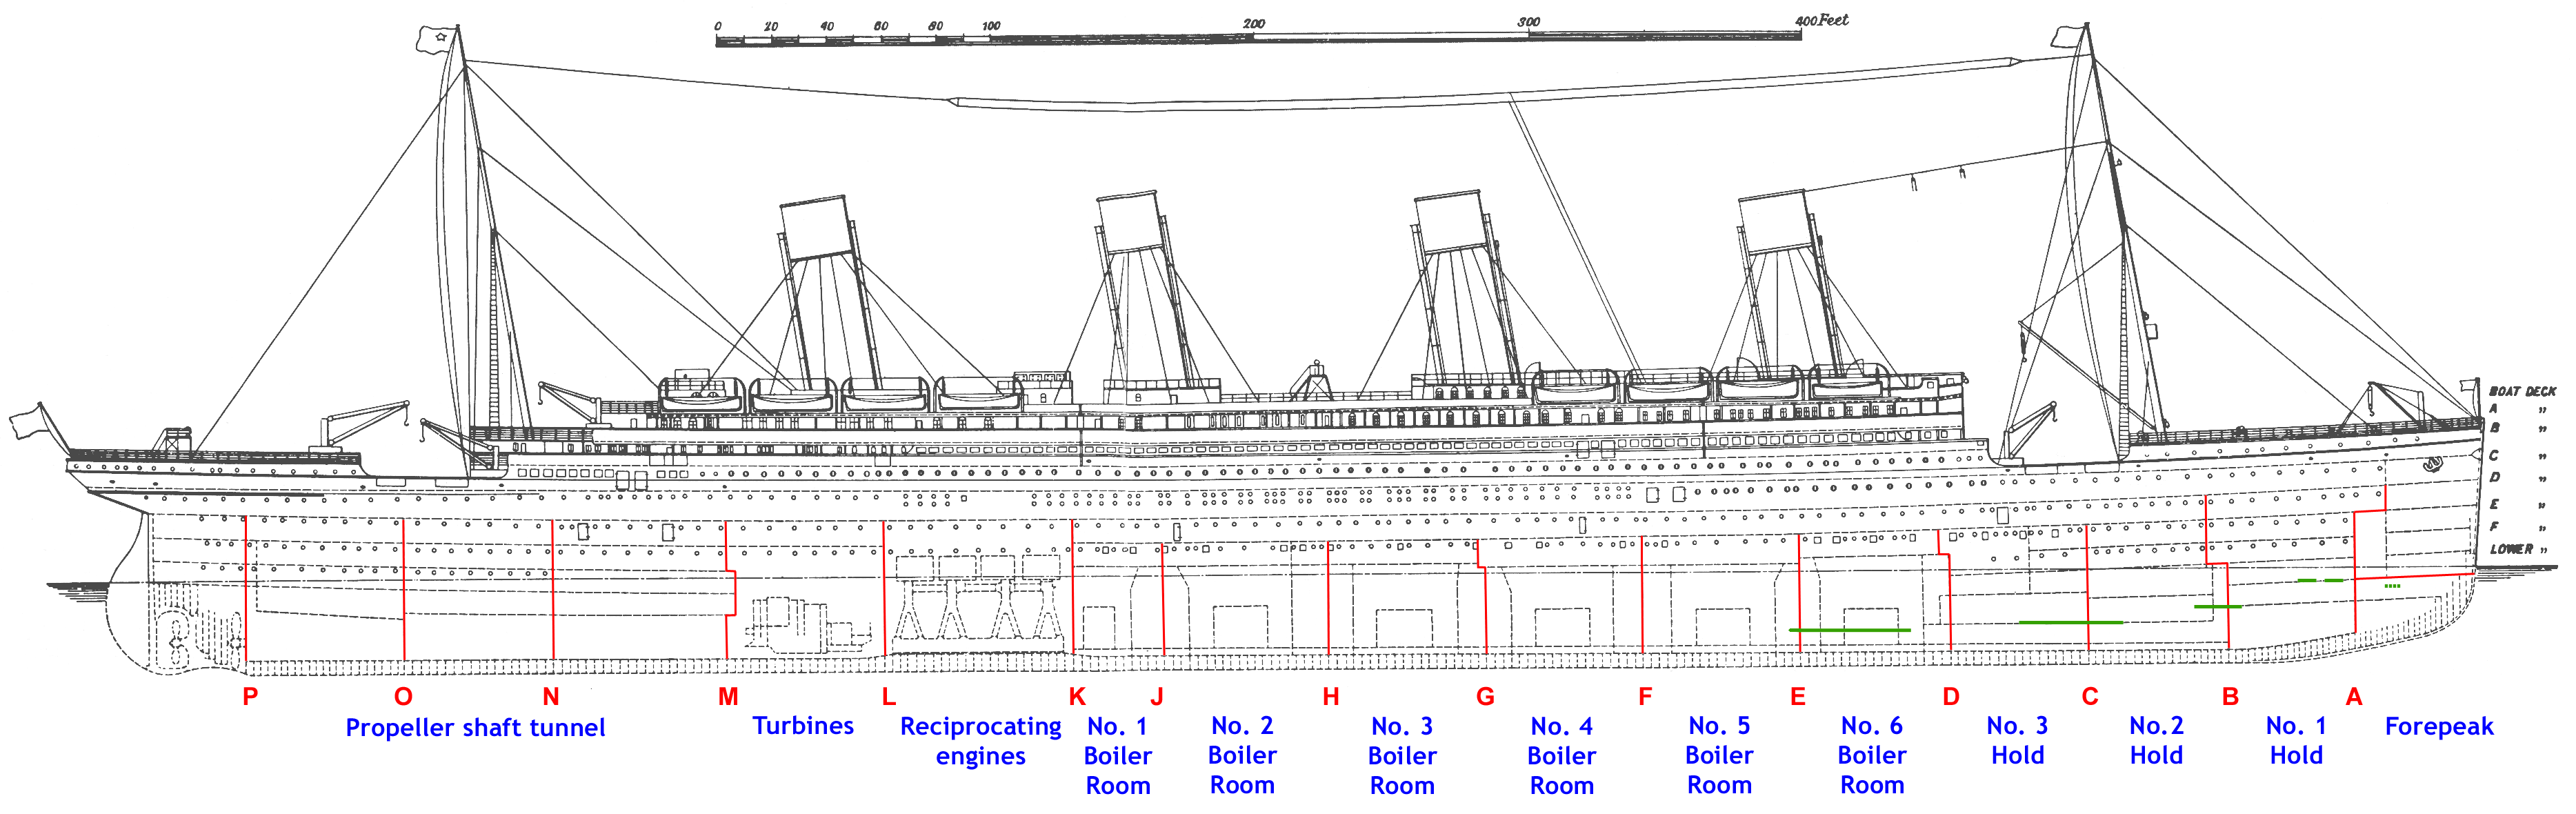


On the Boat Deck there were 6 rooms labeled as T, U, W, X, Y, Z but only the T cabin is present in the dataset
- A, B and C decks were only for 1st class passengers
- D and E decks were for all classes
- F and G decks were for both 2nd and 3rd class passengers

From going A to G, distance to the staircase increases which might be a factor of survival.

So it makes sense to __transform__ the column `Cabin` so that we only keep the first character.  We can do that and then observe the unique values.  In this way we create a new feature which is a transformation from the original data. We are going to overwrite the original column.

In [29]:
Titanic_Train['Cabin'] = Titanic_Train['Cabin'].str[:1]

Titanic_Train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Now, we can repeat the visaulisation with a `countplot` for this field with the new values.  I will use the function we had earlier. 

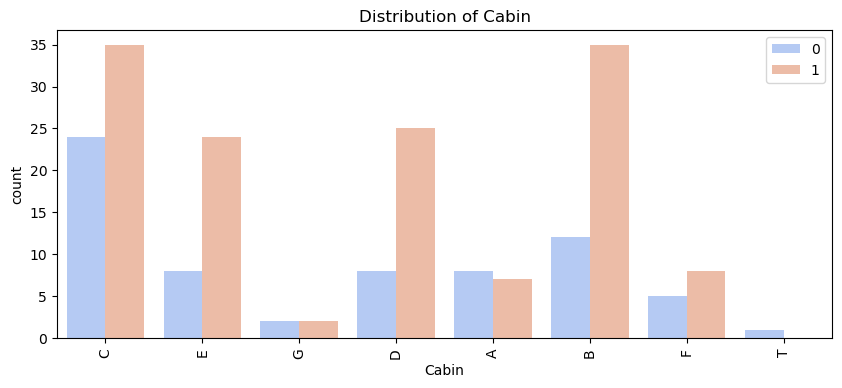

In [30]:
DistPlot(Titanic_Train,'Survived','Cabin')


## New features: calculating new value and aggregation

Family_Size can be created by adding SibSp, Parch and 1. SibSp is the count of siblings and spouse, and Parch is the count of parents and children. Those columns are added in order to find the total size of families. Adding 1 at the end, to account for the current passenger. Graphs will then show that family size could be a predictor of survival because different values have different survival rates. Now we create a new attribute to incorporate that and add it to the data frame.

In [31]:
Family_size=Titanic_Train.SibSp+Titanic_Train.Parch+1
Titanic_Train['Family_size']=Family_size
Titanic_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_Frequency,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,1,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,2,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,0


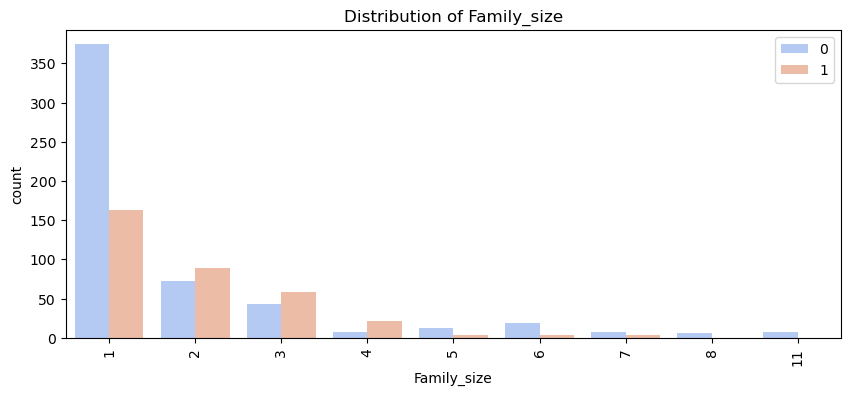

In [32]:
DistPlot(Titanic_Train,'Survived','Family_size')

Next, we look at how we may use the information in _ticket_.  By looking closely, we can see that some ticket numbers may be associated with different members of a family.  For example, if we look at records associated with ticket '113803', we get the following:

In [33]:
print(Titanic_Train.loc[Titanic_Train.Ticket=='113803'])

     PassengerId  Survived  Pclass  \
3              4         1       1   
137          138         0       1   

                                             Name     Sex   Age  SibSp  Parch  \
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
137                   Futrelle, Mr. Jacques Heath    male  37.0      1      0   

     Ticket  Fare Cabin Embarked  Family_size  Ticket_Frequency Title  \
3    113803  53.1     C        S            2                 2   Mrs   
137  113803  53.1     C        S            2                 2    Mr   

     Is_Married  
3             1  
137           0  


So we could use a count of the ticket frequency as a newly engineered feature with high values showing those that had a group or family in the ticket.

In [34]:
Titanic_Train['Ticket_Frequency'] = Titanic_Train.groupby('Ticket')['Ticket'].transform('count')
Titanic_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_Frequency,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,1,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,2,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,0


If we want to understand further, we can look at the highest ticket frequencies to understand if the groups with the same ticket number are always families (which would be accounted for by the Family_size attribute) or maybe unrelated groups.

In [35]:
#Find max Ticket_Frequency
print("Max freq:",Titanic_Train.Ticket_Frequency.max())

#Use that to select Tickets with the highest frequency print their ticket numbers
Large_TicketFreq = Titanic_Train['Ticket'].loc[(Titanic_Train.Ticket_Frequency==Titanic_Train.Ticket_Frequency.max())]
Large_TicketFreq=Large_TicketFreq.unique()
print("Ticket numers with large freq:",Large_TicketFreq)


#print some details of all members under one ticket to understand group composition
PrintCols=['Name','Age','Sex','Family_size']
for number in Large_TicketFreq:
    print(Titanic_Train[Titanic_Train.Ticket==number][PrintCols])

Max freq: 7
Ticket numers with large freq: ['347082' '1601' 'CA. 2343']
                                                  Name   Age     Sex  \
13                         Andersson, Mr. Anders Johan  39.0    male   
119                  Andersson, Miss. Ellis Anna Maria   2.0  female   
541               Andersson, Miss. Ingeborg Constanzia   9.0  female   
542                  Andersson, Miss. Sigrid Elisabeth  11.0  female   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  39.0  female   
813                 Andersson, Miss. Ebba Iris Alfrida   6.0  female   
850            Andersson, Master. Sigvard Harald Elias   4.0    male   

     Family_size  
13             7  
119            7  
541            7  
542            7  
610            7  
813            7  
850            7  
                Name   Age   Sex  Family_size
74     Bing, Mr. Lee  32.0  male            1
169    Ling, Mr. Lee  28.0  male            1
509   Lang, Mr. Fang  26.0  male            1
643  Foo, Mr. C

So some are family groups (e.g.  the Anderssons), but others are groups that may be travelling together (Eg. a Chinese group) but are not family.  Let us know visualise field to see survival according to it, and we can see it may have an association to survival.

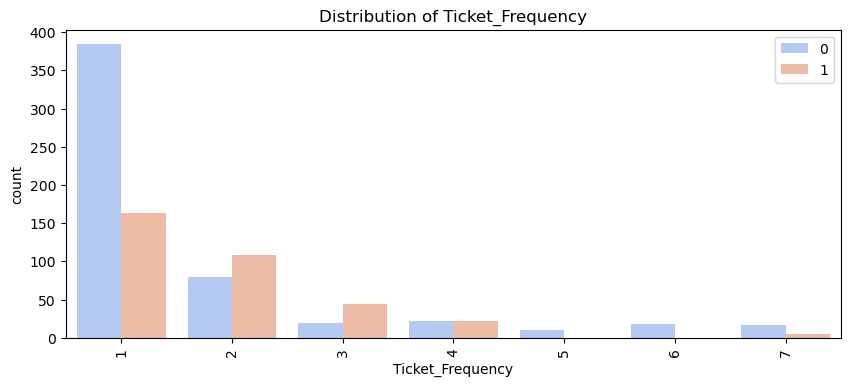

In [36]:
DistPlot(Titanic_Train,'Survived','Ticket_Frequency')

Now, let us try to see if we can extract anything useful from name.  Although names are very varied, _title_ which is embedded in the _Name_ string may help us in our models.  We can extract it as a substring. We can also extract information from title on married status for women as _title_ will give us that.    

/var/folders/_4/f804blyd7p32_4z_qf8cbg140000gq/T/ipykernel_76921/4208666342.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Titanic_Train['Is_Married'].loc[Titanic_Train['Title'] == 'Mrs'] = 1
/var/folders/_4/f804blyd7p32_4z_qf8cbg140000

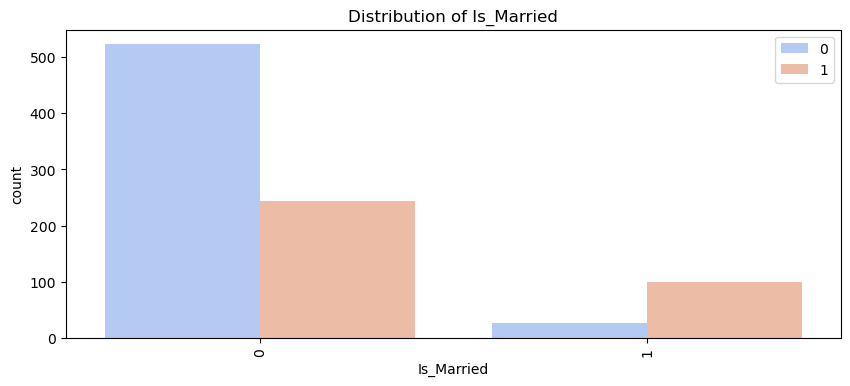

In [37]:
#In the Name field, title is after a comma and finishes with the .
Titanic_Train['Title'] = Titanic_Train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

#Once that is done, we could also create another field which distinguishes married women from all others. 
#We cannot do the same for males as there is no difference in title for them.
Titanic_Train['Is_Married']= 0
Titanic_Train['Is_Married'].loc[Titanic_Train['Title'] == 'Mrs'] = 1

DistPlot(Titanic_Train,'Survived','Is_Married')


We can look at the `unique` titles we have extracted. 

In [38]:
Titanic_Train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

We can visualise the Titel field in relation to survival. 

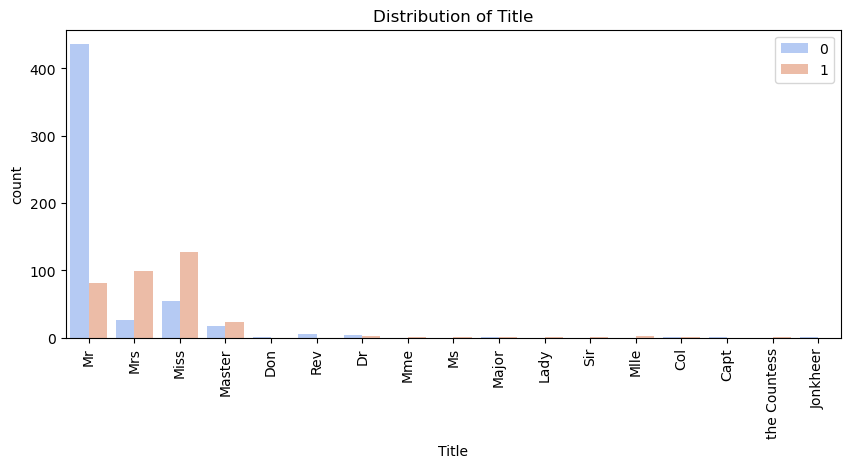

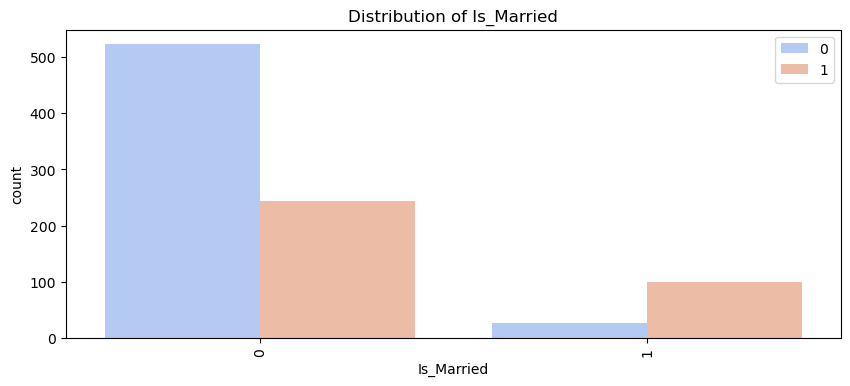

In [39]:
DistPlot(Titanic_Train,'Survived','Title')
DistPlot(Titanic_Train,'Survived','Is_Married')

 We can see there are some differences for some of the more frequent titles but others are very infrequent so we could group them together as _other_ and then plot again. We can rewrite the _Title_ field with the new groupings.

In [40]:
Titanic_Train['Title']=Titanic_Train['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], 'Other')
Titanic_Train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

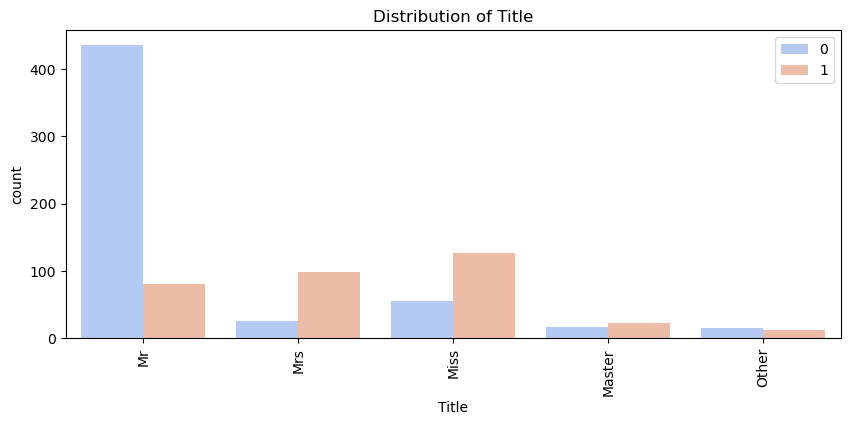

In [41]:
DistPlot(Titanic_Train,'Survived','Title')

Let us now see what fields we do have after all the feature construction.  Note when you run the cell below that the last 4 attributes were constructed by us.  

In [42]:
Titanic_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Ticket_Frequency,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,1,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,2,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr,0


## Categorical label encoding
Many of the algorithms in __scikit-learn__ including for example the `KNNImputer` work on numeric data types only.  So we often need to encode categorical attributes as numbers.  There are many ways to do this.  There is an entire library dedicated to categorical encoding: https://contrib.scikit-learn.org/category_encoders/index.html and we are going to use that so you get use to importing and using additional libraries.  This may require you to install the additional package through Anaconda.  Look for category-encoders in your Anaconda environments and install.  Once you have done that, you can use all the categorical encoders provided. We will use the `OrdinalEncoder'

In [43]:
import category_encoders as ce

# We establish the Ordinal encoder which will convert each categorical label to a number
# We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe instead of an np array
enc = ce.OrdinalEncoder(cols=["Family_size","Ticket_Frequency","Title","Sex","Cabin",'Embarked'],handle_missing='return_nan',return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
X=enc.fit_transform(Titanic_Train)
type(X)

ModuleNotFoundError: No module named 'category_encoders'

Now, we can drop some columns that we are not going to be using in any analysis, namely ` 'PassengerId','Survived', 'Name','Ticket'` as those are either not helpful or the helpful information has been extracted into other variables.  In the case of 'Survived' it is the output or target variable so it should not be in our input data frame `X`.  

In [ ]:
#Look first at the attributes in X currently
X.info()

#Drop unecessary columns and hence set the final columns we will use as a list of column names
X= X.drop(columns=['PassengerId','Survived', 'Name','Ticket'])
FinalCols = X.columns
print(FinalCols)

## Missing values

Let us also examine how many missing values we have in the current dataframe.  For this we can count missing values per attribute.  

In [ ]:
#Let us see this for the train data
missing_val_count_by_column = (X.isnull().sum())
print('Missing columns for the Train data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

#And for the test data 
missing_val_count_by_column = (Titanic_Test.isnull().sum())
print('Missing columns for the Test data:\n',missing_val_count_by_column[missing_val_count_by_column>0])


Note that we have missing values in 3 variables in the train data and another 3 (though not completely in coincidence) in the test data.  We can now impute the missing data in the train set, though we may also need to do this to the test set if we are going to use it later with a model. 

In [ ]:
#import the relevant methods
from sklearn.impute import KNNImputer
nan = np.nan

#Apply KNN imputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
ImputedX=imputer.fit_transform(X)

# Convert output to a data frame to show the stats
dataframe = pd.DataFrame.from_records(ImputedX)
dataframe.columns = FinalCols
print(dataframe.describe())

#Let us see missing values now for the transformed data
missing_val_count_by_column = (dataframe.isnull().sum())
print('Missing columns for the Train data:\n',missing_val_count_by_column[missing_val_count_by_column>0])




## Feature Selection

Now we may decide which features appear to be better from the original features and those that we made.  We start by looking at feature selection algorithms that rank features independently.  

Later, we may instead user a _wrapper_ algorithm i.e. one that we use in conjunction with a classifier.  We may also use a feature selection as part of a pipeline, but this we will do in later labs once we know more about models.  The current approach of ranking featurs would enable us to filter the data before modelling. 

The available feature selection methods are covered here https://scikit-learn.org/stable/modules/feature_selection.html.  We use the `SelectKBest` https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest 

Our first criteria for ranking features is the f_classif, which is the ANOVA F-value between label/feature for the classification tasks.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

#Specify the features to consider and the Y values.  
feature_cols = FinalCols
Y=Titanic_Train['Survived']

#Note that currently our X values which are in ImputedX after imputation are an numpy ndarray
print(type(ImputedX))

# Keep all 12 features but rank them by best f_classif score
selector = SelectKBest(f_classif, k=12)

#Fit and apply feature ranking method
X_new = selector.fit_transform(ImputedX, Y)

#Retrieve the column names for the selected columns
names = X.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
X_new.shape


Now, we can repeat this but with a different ranking meassure, such as the `mutual_info_classif` which is the mutual information for a discrete target.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Keep all features but rank them by best mutual information score
selector = SelectKBest(score_func=mutual_info_classif, k=12)


#Fit and apply feature ranking method
X_new = selector.fit_transform(ImputedX, Y)

#Retrieve the column names for the selected columns
names = X.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)
#Look at shape of new data
X_new.shape





We can see they both coincide in 4 out of the top 5 features. 

## Learning outcomes

In this lab we have learned about 
- More data exploration
- Data exploration to discover new features
- How to create new features by using calculation on existing features, aggregation and more
- How to transform existing features by categorical encoding
- How to select features by a ranking method

Before you go, you can think about what you may need to do with the test data before you use both with a classification algorithm.  Would you have to create the same features? deal with missing values? What about Feature Selection?